# Algorithmic Trading using Machine Learning

**MS** **in** **Applied** **Data** **Science,** **University** **of** **Southern** **California**


Here, I will be forecasting the Close price of Next few days in a single time using Multivariate Time Series Forecasting with LSTM Architecture


**MULTIVARIATE STOCK MARKET PRICE PREDICTION USING LSTM**

In [1]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("fivethirtyeight")
import pandas_datareader as pdr
import datetime as dt
from datetime import datetime

In [2]:
#Fetching the Stock Data
end=datetime.now()
start=datetime(end.year - 5, end.month, end.day)
stock_data=pdr.DataReader("CIDM", data_source="yahoo",start=start,end=end)
stock_data.shape

(1259, 6)

# Data Exploration

In [3]:
#CIDM Stock Data 
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,2.2,1.8,1.8,2.0,53950.0,2.0
2016-05-03,2.1,2.0,2.1,2.1,26080.0,2.1
2016-05-04,2.7,2.0,2.2,2.7,186860.0,2.7
2016-05-05,2.7,2.2,2.7,2.2,65730.0,2.2
2016-05-06,2.2,2.1,2.2,2.1,14500.0,2.1


In [4]:
#Last 5 Days Stock Data
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-26,1.60,1.32,1.33,1.48,86135600.0,1.48
2021-04-27,1.58,1.41,1.48,1.52,72244800.0,1.52
2021-04-28,1.58,1.48,1.51,1.51,57315900.0,1.51
2021-04-29,1.55,1.44,1.52,1.48,54979100.0,1.48
2021-04-30,1.54,1.43,1.46,1.44,65764600.0,1.44


In [5]:
#Description of Stock Market Data
stock_data.describe

<bound method NDFrame.describe of             High   Low  Open  Close      Volume  Adj Close
Date                                                      
2016-05-02  2.20  1.80  1.80   2.00     53950.0       2.00
2016-05-03  2.10  2.00  2.10   2.10     26080.0       2.10
2016-05-04  2.70  2.00  2.20   2.70    186860.0       2.70
2016-05-05  2.70  2.20  2.70   2.20     65730.0       2.20
2016-05-06  2.20  2.10  2.20   2.10     14500.0       2.10
...          ...   ...   ...    ...         ...        ...
2021-04-26  1.60  1.32  1.33   1.48  86135600.0       1.48
2021-04-27  1.58  1.41  1.48   1.52  72244800.0       1.52
2021-04-28  1.58  1.48  1.51   1.51  57315900.0       1.51
2021-04-29  1.55  1.44  1.52   1.48  54979100.0       1.48
2021-04-30  1.54  1.43  1.46   1.44  65764600.0       1.44

[1259 rows x 6 columns]>

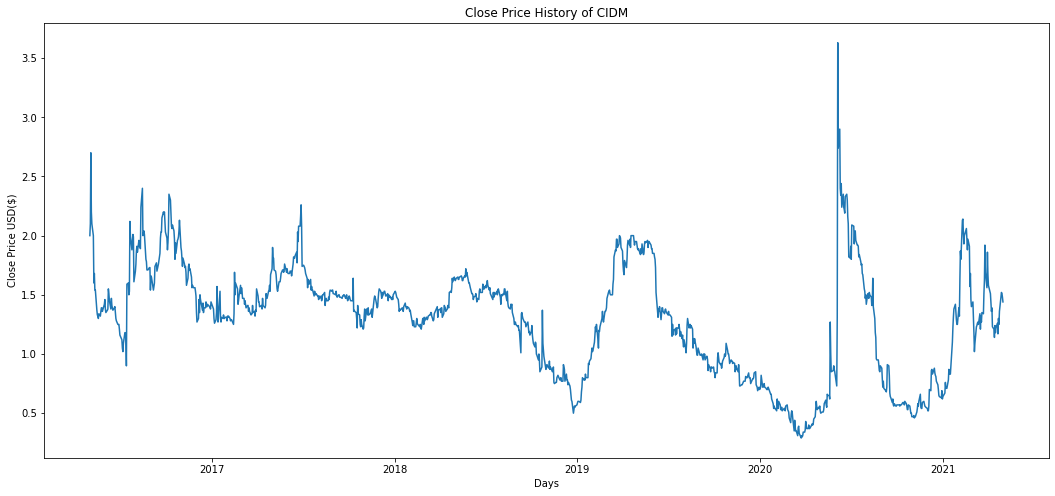

In [6]:
#Plotting the Close Price of the CIDM till today
plt.figure(figsize=(18,8))
plt.title("Close Price History of CIDM")
plt.plot(stock_data['Close'])
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.show()

# Data Preprocessing

In [7]:
#Reset the Index
stock_data=stock_data.reset_index(drop=False)
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-05-02,2.20,1.80,1.80,2.00,53950.0,2.00
1,2016-05-03,2.10,2.00,2.10,2.10,26080.0,2.10
2,2016-05-04,2.70,2.00,2.20,2.70,186860.0,2.70
3,2016-05-05,2.70,2.20,2.70,2.20,65730.0,2.20
4,2016-05-06,2.20,2.10,2.20,2.10,14500.0,2.10
...,...,...,...,...,...,...,...
1254,2021-04-26,1.60,1.32,1.33,1.48,86135600.0,1.48
1255,2021-04-27,1.58,1.41,1.48,1.52,72244800.0,1.52
1256,2021-04-28,1.58,1.48,1.51,1.51,57315900.0,1.51
1257,2021-04-29,1.55,1.44,1.52,1.48,54979100.0,1.48


In [8]:
# Extract dates for the visualization)
stock_date = stock_data['Date']
stock_date = stock_date.dt.strftime('%Y-%m-%d')
stock_date = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in stock_date]


In [9]:
#First, we change the order of the features and we put the depedent variable at the star
features = ['Close', 'High',
       'Low', 'Open','Adj Close', 'Volume']

stock_data = stock_data.reindex(columns = features ) 
stock_data.head(1)

,Close,High,Low,Open,Adj Close,Volume
0,2.0,2.2,1.8,1.8,2.0,53950.0


In [10]:
#Splitting the data into dependent and independent features
X=stock_data.iloc[:,1:]
#Predicting the Close price of data
y=stock_data.iloc[:,:1]

In [11]:
#Removing all commas and convert data to matrix shape format.
X = X.astype(str)
for i in X:
    for j in range(0, len(X)):
        X[i][j] = X[i][j].replace(',', '')

# Using multiple features (predictors)
stock_train = X.to_numpy()

print('Shape of Training set:{}.'.format(stock_train.shape))
stock_train

Shape of Training set:(1259, 5).


array([['2.200000047683716', '1.7999999523162842', '1.7999999523162842',
        '2.0', '53950.0'],
       ['2.0999999046325684', '2.0', '2.0999999046325684',
        '2.0999999046325684', '26080.0'],
       ['2.700000047683716', '2.0', '2.200000047683716',
        '2.700000047683716', '186860.0'],
       ...,
       ['1.5800000429153442', '1.4800000190734863', '1.5099999904632568',
        '1.5099999904632568', '57315900.0'],
       ['1.5499999523162842', '1.440000057220459', '1.5199999809265137',
        '1.4800000190734863', '54979100.0'],
       ['1.5399999618530273', '1.4299999475479126', '1.4600000381469727',
        '1.440000057220459', '65764600.0']], dtype=object)

**Feature** **Scaling**

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
stock_train=scale.fit_transform(stock_train)
print("Scaled Features:",stock_train)

Scaled Features: [[ 1.67942007  1.25885     1.06984108  1.53380177 -0.21469792]
 [ 1.47869738  1.71004572  1.71432567  1.75140745 -0.21672508]
 [ 2.6830321   1.71004572  1.92915421  3.05704309 -0.20503056]
 ...
 [ 0.43494115  0.53693716  0.44683929  0.46753289  3.9503174 ]
 [ 0.37472425  0.44669812  0.46832209  0.40225118  3.78034751]
 [ 0.35465202  0.4241381   0.33942528  0.31520891  4.56484354]]


In [13]:
#Removing all commas and convert data to matrix shape format.
y = y.astype(str)
for i in y:
    for j in range(0, len(y)):
        y[i][j] = y[i][j].replace(',', '')

# Using multiple features (predictors)
stock_pred = y.to_numpy()

print('Shape of Training set:{}.'.format(stock_pred.shape))
stock_pred

Shape of Training set:(1259, 1).


array([['2.0'],
       ['2.0999999046325684'],
       ['2.700000047683716'],
       ...,
       ['1.5099999904632568'],
       ['1.4800000190734863'],
       ['1.440000057220459']], dtype=object)

In [14]:
#Scaling the Prediction (Dependent Feature)
scalepred=StandardScaler()
stock_pred=scalepred.fit_transform(stock_pred)
print("Scaled Close Price:",stock_pred)

Scaled Close Price: [[1.53380177]
 [1.75140745]
 [3.05704309]
 ...
 [0.46753289]
 [0.40225118]
 [0.31520891]]


In [15]:
#Shape of the data
stock_train.shape , stock_pred.shape

((1259, 5), (1259, 1))

In [16]:
#Size of Training data
training_size=int(len(stock_train)*0.80)
#Size of Testing data
test_size=len(stock_train)-training_size
training_size,test_size

(1007, 252)

**Training** **Data**

In [17]:
# Creating a data structure with 90 timestamps 
time_stamp = 90  #Number of Past days to make our model train 
pred_stamp = 30 #Number of Future days to predict

X_train = []
y_train = []

for i in range(time_stamp, training_size - pred_stamp +1):
    X_train.append(stock_train[i - time_stamp:i, 0:stock_data.shape[1] - 1])
    y_train.append(stock_pred[i:i + pred_stamp, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (888, 90, 5).
y_train shape == (888, 30).


**Testing** **Data**

In [18]:
X_test = []
y_test = []

for i in range(time_stamp, test_size - pred_stamp +1):
    X_test.append(stock_train[i - time_stamp:i, 0:stock_data.shape[1] - 1])
    y_test.append(stock_pred[i:i + pred_stamp, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_test shape == (133, 90, 5).
y_test shape == (133, 30).


# Model Selection

In [19]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 6.5MB/s 


In [20]:
#Importing Necessary Libraries of Tensorflow for training LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,TensorBoard
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
import tensorflow as tf

In [21]:
#Training Sequential Model using 3 Hidden layers
model=Sequential()
model.add(LSTM(128,input_shape=(time_stamp,stock_train.shape[1]),return_sequences=True)) #66
model.add(LSTM(64,return_sequences=True)) #66
model.add(LSTM(32,return_sequences=False))

model.add(Dropout(0.25))
model.add(Dense(32))
model.add(Dense(pred_stamp,activation='linear'))

#Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 128)           68608     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                990       
Total params: 132,478
Trainable params: 132,478
Non-trainable params: 0
__________________________________________________

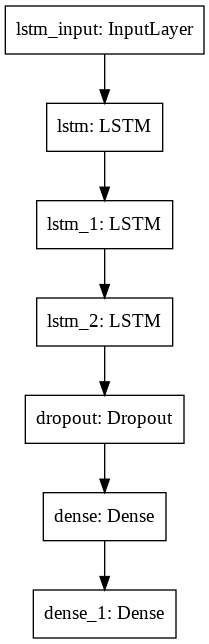

In [22]:
#Architecture of LSTM Model
tf.keras.utils.plot_model(model)

In [23]:

#Model Compilation (With Matrics including Macro and Micro F1 Score and AUC Score)
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=[
                       tf.keras.metrics.MeanAbsoluteError(),
                      ])

In [24]:
%%time
#Callbacks
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
es= EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1) #pat=10
#Model Fitting
lstm = model.fit(X_train, y_train,  
                    epochs=100, 
                    callbacks=[es],
                    validation_data=(X_test,y_test), 
                    verbose=2,
                    batch_size=128) #64

Epoch 1/100
7/7 - 10s - loss: 0.6679 - mean_absolute_error: 0.6395 - val_loss: 0.4527 - val_mean_absolute_error: 0.4712
Epoch 2/100
7/7 - 3s - loss: 0.5196 - mean_absolute_error: 0.5474 - val_loss: 0.3755 - val_mean_absolute_error: 0.4298
Epoch 3/100
7/7 - 3s - loss: 0.4066 - mean_absolute_error: 0.4815 - val_loss: 0.3074 - val_mean_absolute_error: 0.3947
Epoch 4/100
7/7 - 3s - loss: 0.3249 - mean_absolute_error: 0.4322 - val_loss: 0.2583 - val_mean_absolute_error: 0.3785
Epoch 5/100
7/7 - 3s - loss: 0.2603 - mean_absolute_error: 0.3916 - val_loss: 0.2496 - val_mean_absolute_error: 0.3599
Epoch 6/100
7/7 - 3s - loss: 0.2198 - mean_absolute_error: 0.3623 - val_loss: 0.2364 - val_mean_absolute_error: 0.3474
Epoch 7/100
7/7 - 3s - loss: 0.2000 - mean_absolute_error: 0.3429 - val_loss: 0.2068 - val_mean_absolute_error: 0.3537
Epoch 8/100
7/7 - 3s - loss: 0.1866 - mean_absolute_error: 0.3319 - val_loss: 0.2141 - val_mean_absolute_error: 0.3277
Epoch 9/100
7/7 - 3s - loss: 0.1764 - mean_abso

# Model Evaluation

**Traning and Validation Loss Graph**

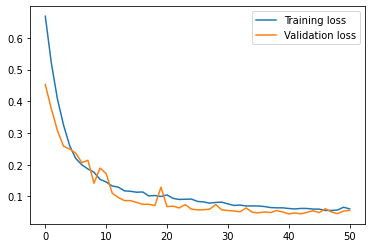

In [25]:
#Plotting Traning and Validation Loss of LSTM Architecture
plt.plot(lstm.history['loss'], label='Training loss')
plt.plot(lstm.history['val_loss'], label='Validation loss')
plt.legend()

In [26]:
#Predicted Values
train_predict = model.predict(X_train)
test_predict =  model.predict(X_test)

In [27]:
#Shape of the Data
train_predict.shape, test_predict.shape

((888, 30), (133, 30))

In [28]:
#Perfoming Inverse Transformation to get original data
train_predict=scalepred.inverse_transform(train_predict)
test_predict=scalepred.inverse_transform(test_predict)

In [29]:
#Perfoming Inverse Transformation to get original Close Price data
y_test=scalepred.inverse_transform(y_test)
y_train=scalepred.inverse_transform(y_train)

In [30]:
#Calculating Mean Absolute Error on Test Data
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_predict, y_test)
print("Mean Absolute Error of Test Data",MAE)

MAE = mean_absolute_error(train_predict, y_train)
print("Mean Absolute Error of Train Data:",MAE)

Mean Absolute Error of Test Data 0.08763136941388737
Mean Absolute Error of Train Data: 0.07941551869315605


In [33]:
#Predicting Batch of Next 30 Days Close Price
test_predict[0]

array([1.9502741, 1.9986169, 2.003212 , 1.981899 , 2.038131 , 2.0323424,
       2.0457926, 2.0621257, 2.075021 , 2.0677764, 2.0571125, 2.0520294,
       2.1126559, 2.1070673, 2.0826004, 2.0411468, 2.0519686, 2.0877259,
       2.0490122, 2.080253 , 2.0640376, 2.0703807, 2.040109 , 2.0128558,
       1.9961867, 2.0665674, 1.9431163, 1.9658477, 1.9406414, 1.890782 ],
      dtype=float32)

In [31]:
#Next 30 Days Forecast of Close Price
output=test_predict[-1]
output

array([1.4465605, 1.4344887, 1.4504371, 1.4426419, 1.453146 , 1.4541765,
       1.4741145, 1.4514403, 1.4673239, 1.4479493, 1.4846351, 1.4712837,
       1.4651374, 1.4679037, 1.4691021, 1.4996574, 1.4769461, 1.4866785,
       1.4775292, 1.485542 , 1.4703469, 1.481568 , 1.4952407, 1.4927036,
       1.4901671, 1.4845208, 1.5073444, 1.5018324, 1.5131671, 1.5060549],
      dtype=float32)

In [35]:
#Converting Output to Dataframe to Display it opposite to date wise
output=pd.DataFrame(output,columns=['Predicted'])

In [37]:
#Creating the List of Next 15 days Dates
import datetime 
i=0
weekdays=[]
for i in range(50):
  if len(weekdays)<30:
    NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=i+1)
    if NextDay_Date.isoweekday()!=6 and NextDay_Date.isoweekday()!=7:
      weekdays.append(NextDay_Date)

In [38]:
#Strip the date in Y-M-D Format
dates=[]
for i in weekdays:
  a= i.strftime("%Y-%m-%d")
  dates.append(a)

In [39]:
#Converting to Dataframe
dates=pd.DataFrame(dates)

In [40]:
#Merging Future Dates and Predicted Values
final=dates.merge(output,how='left',on=dates.index)
#Reset Index
final.set_index(0,inplace=True)
#Drop Previous Index
final.drop(columns='key_0', inplace=True)

In [42]:
#Rename the Dataframe Name
final.rename(columns = {0:"Predicted"}, inplace = True)
final.index.names = ['Date']

In [44]:
#Table of Next 30 Days Forecast
print("""Next 30 Days Forecasted Close Price""")
#Creating a Table to store the above output.

from tabulate import tabulate
print(tabulate(final,headers="keys",tablefmt="fancy_grid"))

Next 30 Days Forecasted Close Price
╒════════════╤═════════════╕
│ Date       │   Predicted │
╞════════════╪═════════════╡
│ 2021-05-03 │     1.44656 │
├────────────┼─────────────┤
│ 2021-05-04 │     1.43449 │
├────────────┼─────────────┤
│ 2021-05-05 │     1.45044 │
├────────────┼─────────────┤
│ 2021-05-06 │     1.44264 │
├────────────┼─────────────┤
│ 2021-05-07 │     1.45315 │
├────────────┼─────────────┤
│ 2021-05-10 │     1.45418 │
├────────────┼─────────────┤
│ 2021-05-11 │     1.47411 │
├────────────┼─────────────┤
│ 2021-05-12 │     1.45144 │
├────────────┼─────────────┤
│ 2021-05-13 │     1.46732 │
├────────────┼─────────────┤
│ 2021-05-14 │     1.44795 │
├────────────┼─────────────┤
│ 2021-05-17 │     1.48464 │
├────────────┼─────────────┤
│ 2021-05-18 │     1.47128 │
├────────────┼─────────────┤
│ 2021-05-19 │     1.46514 │
├────────────┼─────────────┤
│ 2021-05-20 │     1.4679  │
├────────────┼─────────────┤
│ 2021-05-21 │     1.4691  │
├────────────┼─────────────┤
│ 2021-